# 探索性数据分析

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style='whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'SimHei'
import warnings
warnings.filterwarnings('ignore')

## 数据导入

In [2]:
# 读取数据
df = pd.read_csv("data/raw/guangzhou_garden_hotel_comments_2023-2025.csv")
print(f"原始评论数: {len(df)}")
df.head(2)

原始评论数: 2607


,_id,comment,images,score,publish_date,room_type,travel_type,useful_count,review_count
0,68027895e3c98b0941765706,房间非常好 装修很厚重奢华 一开始看评论 看酒店自己po的照片 感觉跟快捷酒店一样 有些害怕...,"[ ""https://dimg04.c-ctrip.com/images/0230y1200...",5.0,2025年4月5日,红棉大床套房,家庭亲子,0,7条点评
1,68027895e3c98b0941765707,花园酒店广州的老牌五星，一直期望的入住。房间我入住时要求前台帮我升级了新装修的房间，粤韵。其...,"[ ""https://dimg04.c-ctrip.com/images/023461200...",4.2,2025年4月7日,红棉大床套房,独自旅行,0,28条点评


In [3]:
# 查看基础信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           2607 non-null   object 
 1   comment       2607 non-null   object 
 2   images        2607 non-null   object 
 3   score         2607 non-null   float64
 4   publish_date  2607 non-null   object 
 5   room_type     2607 non-null   object 
 6   travel_type   2607 non-null   object 
 7   useful_count  2607 non-null   int64  
 8   review_count  2604 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 183.4+ KB


## 缺失值、重复值检查

In [4]:
# 缺失值检查
df.isnull().sum()

_id             0
comment         0
images          0
score           0
publish_date    0
room_type       0
travel_type     0
useful_count    0
review_count    3
dtype: int64

In [5]:
# 填充缺失值
df['review_count'].fillna("0条评论", inplace=True)
df.isnull().sum()

_id             0
comment         0
images          0
score           0
publish_date    0
room_type       0
travel_type     0
useful_count    0
review_count    0
dtype: int64

In [6]:
# 重复值检查
print(f"重复评论数: {df['comment'].duplicated().sum()}")
df.iloc[[2595, 2596, 2597]]

重复评论数: 65


,_id,comment,images,score,publish_date,room_type,travel_type,useful_count,review_count
2595,68028543e3c98b09417662b4,非常棒的酒店，靠近外国餐馆，服务也很好,"[ ""https://dimg04.c-ctrip.com/images/0230n1200...",5.0,2024年1月19日,花园大床房,商务出差,0,83条点评
2596,68028543e3c98b09417662b5,非常棒的酒店，靠近外国餐馆，服务也很好,"[ ""https://dimg04.c-ctrip.com/images/0236n1200...",5.0,2024年1月19日,城央绿意双床房,商务出差,0,83条点评
2597,68028543e3c98b09417662b6,非常棒的酒店，靠近外国餐馆，服务也很好,"[ ""https://dimg04.c-ctrip.com/images/023041200...",5.0,2024年1月19日,城央绿意双床房,商务出差,0,83条点评


In [7]:
# 删除重复评论
df = df[~df['comment'].duplicated()]
print(f"重复评论数: {df['comment'].duplicated().sum()}")
print(f"剩余评论数: {len(df)}")

重复评论数: 0
剩余评论数: 2542


## 特征提取与描述性统计

In [8]:
# 评论发布日期格式化
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y年%m月%d日')

# 计算评论长度及其对数
df['comment_len'] = df['comment'].astype(str).apply(len)
df['log_comment_len'] = np.log(df['comment_len'] + 1)

# 清洗 review_count (例如 "7条点评" -> 7)
def extract_num(text):
    nums = re.findall(r'\d+', str(text))
    return int(nums[0]) if nums else 0

# 提取回复数并计算其对数
df['review_count'] = df['review_count'].apply(extract_num)
df['log_review_count'] = np.log(df['review_count'] + 1)

# 计算点赞数对数
df['log_useful_count'] = np.log(df['useful_count'] + 1)

# 描述性统计
features = ['score', 'publish_date', 'comment_len', 'log_comment_len', 'review_count', 'log_review_count', 'useful_count', 'log_useful_count']
df[features].describe()

,score,publish_date,comment_len,log_comment_len,review_count,log_review_count,useful_count,log_useful_count
count,2542.000000,2542,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,4.769315,2024-03-11 19:39:25.066876416,109.593627,4.288691,16.420142,2.269459,0.234854,0.094861
min,0.500000,2023-01-02 00:00:00,3.000000,1.386294,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2023-09-07 00:00:00,45.000000,3.828641,4.000000,1.609438,0.000000,0.000000
50%,5.000000,2024-02-15 00:00:00,72.000000,4.290459,8.000000,2.197225,0.000000,0.000000
75%,5.000000,2024-10-04 00:00:00,133.000000,4.897840,17.000000,2.890372,0.000000,0.000000
max,5.000000,2025-04-18 00:00:00,1821.000000,7.507690,552.000000,6.315358,37.000000,3.637586
std,0.621631,NaN,121.390509,0.940999,28.586408,1.013714,1.488615,0.340513


In [9]:
# 房型统计
df['room_type'].value_counts()

room_type
花园大床房           879
花园双床房           836
红棉大床套房          378
红棉双床套房          168
城央绿意双床房         101
城央绿意大床房         100
粤韵双床套房           37
粤韵大床套房           19
羊羊得意主题大床房        12
花园行政大床套房          5
大嘴猴亲子主题大床房        2
花园行政双床套房          2
盼酷小黄鸭亲子主题大床房      1
盼酷小黄鸭亲子主题套房       1
羊羊得意主题大床套房        1
Name: count, dtype: int64

In [10]:
# 模糊房型映射
room_map = {
    "花园大床房": "大床房",
    "花园双床房": "双床房",
    "红棉大床套房": "套房",
    "红棉双床套房": "套房",
    "城央绿意大床房": "大床房",
    "城央绿意双床房": "双床房",
    "粤韵大床套房": "套房",
    "粤韵双床套房": "套房",
    "花园行政大床套房": "套房",
    "花园行政双床套房": "套房",
    "羊羊得意主题大床房": "主题房",
    "羊羊得意主题大床套房": "主题房",
    "大嘴猴亲子主题大床房": "主题房", 
    "盼酷小黄鸭亲子主题大床房": "主题房",
    "盼酷小黄鸭亲子主题套房": "主题房"
}
df['fuzzy_room_type'] = df['room_type'].map(room_map)

# 模糊房型统计
df['fuzzy_room_type'].value_counts()

fuzzy_room_type
大床房    979
双床房    937
套房     609
主题房     17
Name: count, dtype: int64

In [11]:
# 出行类型统计
df['travel_type'].value_counts()

travel_type
家庭亲子    1353
商务出差     415
朋友出游     277
情侣出游     243
独自旅行     142
其他       106
代人预订       6
Name: count, dtype: int64

## 特征分布可视化

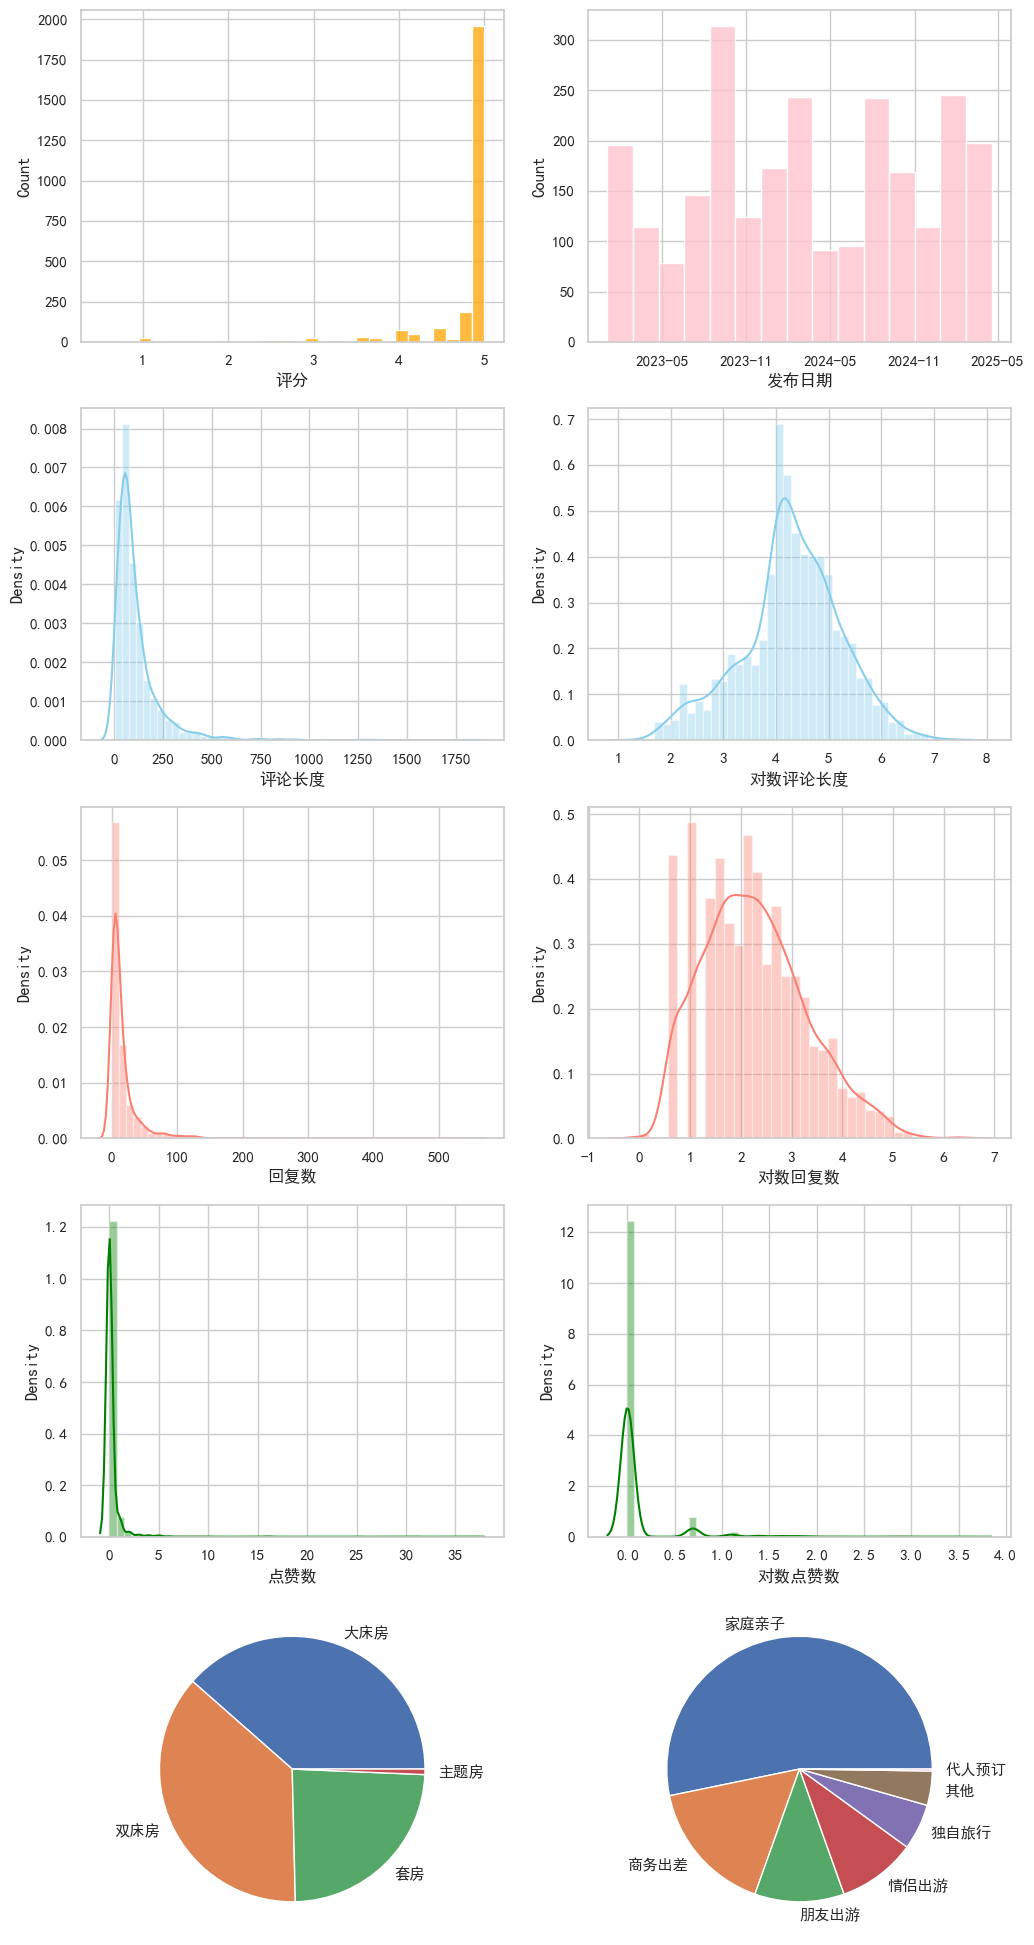

In [12]:
# 数据可视化
fig, axes = plt.subplots(5, 2, figsize=(12, 25))

# (1) 评分分布
ax = axes[0][0]
sns.histplot(df['score'], ax=ax, color='orange', bins=30)
ax.set_xlabel("评分")

# (2) 发布日期分布
ax = axes[0][1]
sns.histplot(df['publish_date'], ax=ax, color='pink')
ax.set_xlabel("发布日期")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# (3) 评论长度分布
ax = axes[1][0]
sns.distplot(df['comment_len'], ax=ax, color='skyblue')
ax.set_xlabel("评论长度")

# (4) 对数长度分布
ax = axes[1][1]
sns.distplot(df['log_comment_len'], ax=ax, color='skyblue')
ax.set_xlabel("对数评论长度")

# (5) 回复数分布
ax = axes[2][0]
sns.distplot(df['review_count'], ax=ax, color='salmon')
ax.set_xlabel("回复数")

# (6) 对数回复数分布
ax = axes[2][1]
sns.distplot(df['log_review_count'], ax=ax, color='salmon')
ax.set_xlabel("对数回复数")

# (7) 点赞数分布
ax = axes[3][0]
sns.distplot(df['useful_count'], ax=ax, color='green')
ax.set_xlabel("点赞数")

# (8) 对数点赞数分布
ax = axes[3][1]
sns.distplot(df['log_useful_count'], ax=ax, color='green')
ax.set_xlabel("对数点赞数")

# (9) 模糊房型分布
ax = axes[4][0]
data = df['fuzzy_room_type'].value_counts()
ax.pie(data, labels=data.index)

# (10) 出行类型分布
ax = axes[4][1]
data = df['travel_type'].value_counts()
ax.pie(data, labels=data.index)

plt.show()

## 数据保存

In [13]:
# 调整列顺序
df = df[['_id', 'comment', 'images', 'score', 'publish_date', 'room_type', 'fuzzy_room_type', 'travel_type',
         'comment_len', 'log_comment_len', 'useful_count', 'log_useful_count', 'review_count', 'log_review_count']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2542 entries, 0 to 2606
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id               2542 non-null   object        
 1   comment           2542 non-null   object        
 2   images            2542 non-null   object        
 3   score             2542 non-null   float64       
 4   publish_date      2542 non-null   datetime64[ns]
 5   room_type         2542 non-null   object        
 6   fuzzy_room_type   2542 non-null   object        
 7   travel_type       2542 non-null   object        
 8   comment_len       2542 non-null   int64         
 9   log_comment_len   2542 non-null   float64       
 10  useful_count      2542 non-null   int64         
 11  log_useful_count  2542 non-null   float64       
 12  review_count      2542 non-null   int64         
 13  log_review_count  2542 non-null   float64       
dtypes: datetime64[ns](1), float64

In [14]:
# 保存数据
df.to_csv("data/processed/hotel_comments_cleaned.csv", index=False, encoding='utf_8_sig')
df.head(20).to_csv("data/processed/hotel_comments_cleaned_1-20.csv", index=False, encoding='utf_8_sig')
print(f"剩余评论数: {len(df)}")
df.head(1)

剩余评论数: 2542


,_id,comment,images,score,publish_date,room_type,fuzzy_room_type,travel_type,comment_len,log_comment_len,useful_count,log_useful_count,review_count,log_review_count
0,68027895e3c98b0941765706,房间非常好 装修很厚重奢华 一开始看评论 看酒店自己po的照片 感觉跟快捷酒店一样 有些害怕...,"[ ""https://dimg04.c-ctrip.com/images/0230y1200...",5.0,2025-04-05,红棉大床套房,套房,家庭亲子,320,5.771441,0,0.0,7,2.079442
